### Image Processing ONLY

In [1]:
# check PIL and Pillow version numbers
import PIL

In [2]:
print('Pillow Version:', PIL.__version__)

Pillow Version: 9.2.0


In [4]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('d:/data/data/images/Sydney-Opera-House.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

JPEG
L
(640, 360)


In [8]:
# How to Convert Images to NumPy Arrays and Back

uint8
(360, 640, 3)


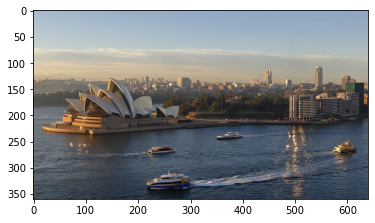

In [22]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('d:/download/images/Sydney-Opera-House.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [23]:
# load image and convert to and from NumPy array
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('d:/download/images/Sydney-Opera-House.jpg')
# convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)

(360, 640, 3)
None
RGB
(640, 360)


In [32]:
# example of saving a grayscale version of a loaded image
from PIL import Image
# load the image
image = Image.open('d:/download/images/Sydney-Opera-House.jpg')
# convert the image to grayscale
gs_image = image.convert(mode='L')
# save in jpeg format
gs_image.save('d:/download/images/Sydney-Opera-House.jpg')
# load the image again and show it
image2 = Image.open('d:/download/images/Sydney-Opera-House.jpg')
# show the image
image2.show()

In [34]:
# create a thumbnail of an image
from PIL import Image
# load the image
image = Image.open('d:/download/images/Sydney-Opera-House.jpg')
# report the size of the image
print(image.size)
# create a thumbnail and preserve aspect ratio
image.thumbnail((100,100))
# report the size of the modified image
print(image.size)
# show the image
image.show()

(640, 360)
(100, 56)


In [35]:
# resize image and force a new shape
from PIL import Image
# load the image
image = Image.open('d:/download/images/Sydney-Opera-House.jpg')
# report the size of the image
print(image.size)
# resize image and ignore original aspect ratio
img_resized = image.resize((200,200))
# report the size of the thumbnail
print(img_resized.size)
# show the image
img_resized.show()

(640, 360)
(200, 200)


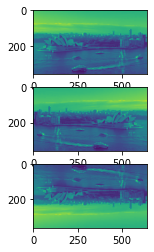

In [36]:
# create flipped versions of an image
from PIL import Image
from matplotlib import pyplot
# load image
image = Image.open('d:/download/images/Sydney-Opera-House.jpg')
# horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
# vertical flip
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)
# plot all three images using matplotlib
pyplot.subplot(311)
pyplot.imshow(image)
pyplot.subplot(312)
pyplot.imshow(hoz_flip)
pyplot.subplot(313)
pyplot.imshow(ver_flip)

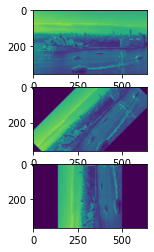

In [37]:
# create rotated versions of an image
from PIL import Image
from matplotlib import pyplot
# load image
image = Image.open('d:/download/images/Sydney-Opera-House.jpg')
# plot original image
pyplot.subplot(311)
pyplot.imshow(image)
# rotate 45 degrees
pyplot.subplot(312)
pyplot.imshow(image.rotate(45))
# rotate 90 degrees
pyplot.subplot(313)
pyplot.imshow(image.rotate(90))
pyplot.show()

### Fashion with CNN

In [75]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [77]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

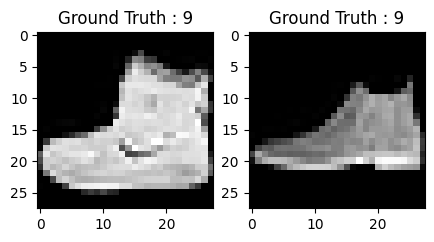

In [78]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [79]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [80]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [81]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [82]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [83]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [91]:
import keras
#from keras.models import Sequential,Input,Model
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
import numpy as np
from keras.utils import to_categorical

In [92]:
batch_size = 64
epochs = 20
num_classes = 10

In [93]:
fashion_model = Sequential()
fashion_model.add(Conv2D(2, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [94]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [95]:
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 2)         20        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 2)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 2)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [96]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 17s 22ms/step - loss: 0.4926 - accuracy: 0.8195 - val_loss: 0.3444 - val_accuracy: 0.8744
Epoch 2/20
750/750 [==============================] - 17s 23ms/step - loss: 0.3093 - accuracy: 0.8864 - val_loss: 0.3094 - val_accuracy: 0.8895
Epoch 3/20
750/750 [==============================] - 18s 24ms/step - loss: 0.2640 - accuracy: 0.9022 - val_loss: 0.2777 - val_accuracy: 0.9013
Epoch 4/20
750/750 [==============================] - 18s 25ms/step - loss: 0.2302 - accuracy: 0.9140 - val_loss: 0.2690 - val_accuracy: 0.9009
Epoch 5/20
750/750 [==============================] - 18s 24ms/step - loss: 0.2047 - accuracy: 0.9234 - val_loss: 0.2607 - val_accuracy: 0.9068
Epoch 6/20
750/750 [==============================] - 18s 24ms/step - loss: 0.1790 - accuracy: 0.9346 - val_loss: 0.2523 - val_accuracy: 0.9088
Epoch 7/20
750/750 [==============================] - 18s 24ms/step - loss: 0.1578 - accuracy: 0.9405 - val_loss: 0.2585 - val_accuracy:

In [97]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [98]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5306001305580139
Test accuracy: 0.9017000198364258


### MNIST - No CNN

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
import random

In [9]:
#import 60000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [11]:
# So we will implement assert statement for validating the input.

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

Before we see our images in our data set, we must not forget each digit in the dataset has lots of handwritten images. So we will show 5 random pictures of each digit.

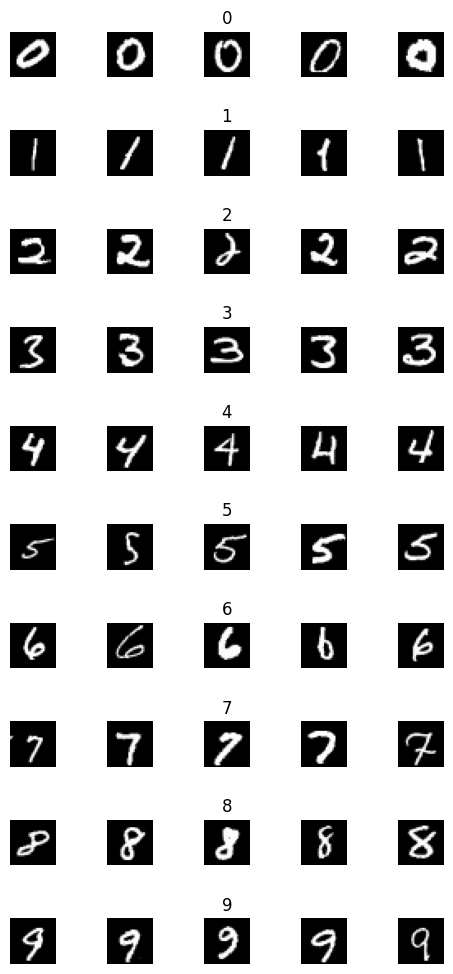

In [12]:
num_of_samples = []

cols = 5 #We will select 5 random images
num_of_classes = 10 #each digit total: 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray')) 
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


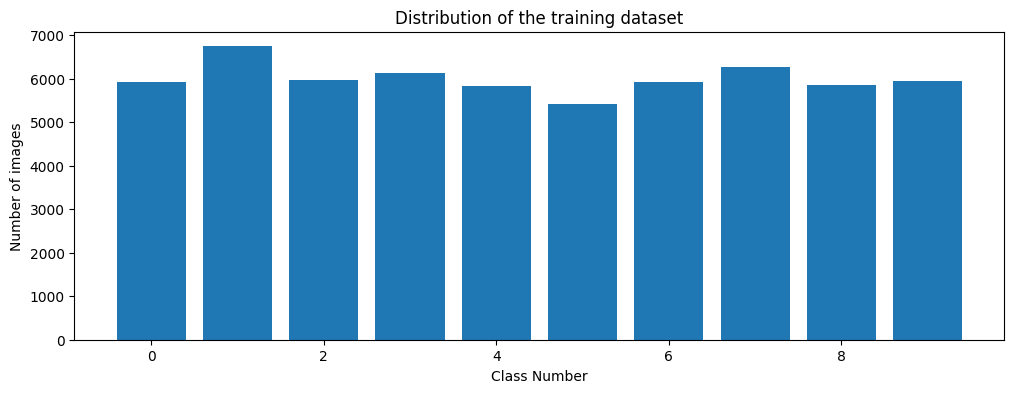

In [22]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
#Text(0, 0.5, 'Number of images')

import matplotlib.pyplot as plt

# Assuming you are trying to add a label on the y-axis
plt.ylabel('Number of images')

# Show the plot or save it to a file
plt.show()

In [23]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [24]:
#Each image has Intensity from 0 to 255
X_train = X_train/255 
X_test = X_test/255
#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                         num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                         num_pixels)
print(X_train.shape)

(60000, 784)


In [25]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels, #num_pixels: 784
                  activation = 'relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), #lr: learning rate
                loss='categorical_crossentropy', #loss function
               metrics=['accuracy'])
  return model

In [26]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\aicyb\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, 
                    verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 1s 2ms/step - loss: 0.6489 - accuracy: 0.7942 - val_loss: 0.3207 - val_accuracy: 0.9085
Epoch 2/10
270/270 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.9047 - val_loss: 0.2574 - val_accuracy: 0.9277
Epoch 3/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.9193 - val_loss: 0.2358 - val_accuracy: 0.9335
Epoch 4/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2540 - accuracy: 0.9264 - val_loss: 0.2131 - val_accuracy: 0.9418
Epoch 5/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2368 - accuracy: 0.9312 - val_loss: 0.2064 - val_accuracy: 0.9412
Epoch 6/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9340 - val_loss: 0.1936 - val_accuracy: 0.9432
Epoch 7/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2191 - accuracy: 0.9368 - val_loss: 0.2002 - val_accuracy: 0.9407
Epoch 

We will keep our training model in history so we can plot and see some visual content. Let’s see them.

Text(0.5, 0, 'epoch')

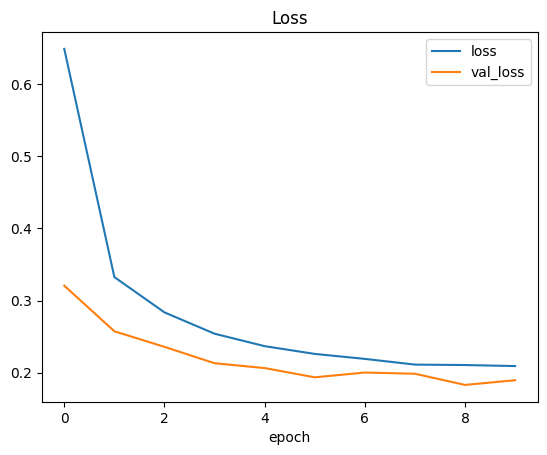

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

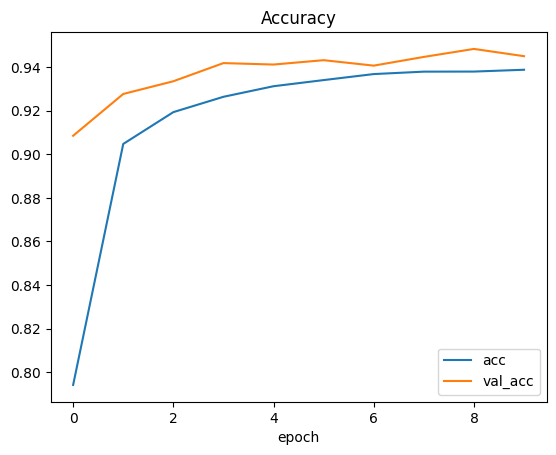

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

Now we train our model. Let’s test our model .First we will get an image from url. You can test whatever image you want.

### MNIST with CNN

In [100]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

We also know that there are 10 classes and that classes are represented as unique integers.

We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes. We can achieve this with the to_categorical() utility function.

In [101]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [102]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [103]:
# convert from integers to floats
train_norm = train.astype('float32')
test_norm = test.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

The prep_pixels() function below implements these behaviors and is provided with the pixel values for both the train and test datasets that will need to be scaled.

In [104]:
# This function must be called to prepare the pixel values prior to any modeling.

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [105]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
   
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [114]:
# evaluate a model using k-fold cross-validation
KFold=5
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [115]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [116]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

### Complete Code

In [ ]:
# deeper cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

> 98.783
> 99.108
> 98.850
